Metadata line: File Name: blom.rle  No. Iterations: 1000   
<re.Match object; span=(21, 41), match='No. Iterations: 1000'>


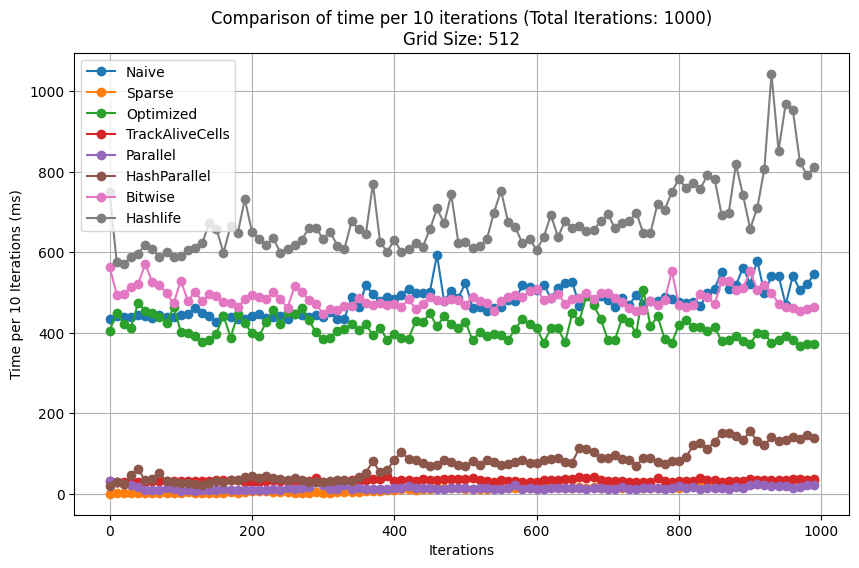

Grid Size: 512
Number of Iterations: 1000


In [12]:

# Plotting Time per 10 iterations

import matplotlib.pyplot as plt
import csv
import numpy as np
import re

# File path (change it to your actual CSV file path)
file_path = "blom.rle_1000_3_results.csv"  # Update this to your CSV file

# Initialize variables
methods = {}
num_iterations = 100  # Default number of iterations
grid_size = None

# Open and read the CSV file
with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    # Read metadata line (first line)
    metadata = " ".join(next(reader))  # Read the metadata line and join all columns
    print(f"Metadata line: {metadata}")
    
    # Extract number of iterations from the metadata line
    match_iterations = re.search(r"No\. Iterations:\s*(\d+)", metadata)
    print(match_iterations)
    if match_iterations:
        num_iterations = int(match_iterations.group(1))  # Extract number of iterations safely
    
    # Skip the actual header of the data and the blank line after the metadata
    next(reader)
    
    # Read the actual data
    for row in reader:
        # Extract grid size from the first column
        grid_size = int(row[0])  # Assuming grid size is always in the first column
        name = row[1]  # The method name (column 2 in the CSV)
        times_per_10 = eval(row[3]) if row[3].startswith("[") else []  # Convert string list to actual list
        methods[name] = times_per_10

# Set up the x-axis (iterations)
x_values = np.arange(0, num_iterations, 10)  # Use 10 steps (from 0 to num_iterations)

# Plot each method's time per 10 iterations
plt.figure(figsize=(10, 6))
for method, times in methods.items():
    if times:
        plt.plot(x_values, times[:len(x_values)], label=method, marker='o', linestyle='-')

# Configure the plot
plt.xlabel("Iterations")
plt.ylabel("Time per 10 Iterations (ms)")
plot_title = f"Comparison of time per 10 iterations (Total Iterations: {num_iterations})"
if grid_size:
    plot_title += f"\nGrid Size: {grid_size}"
plt.title(plot_title)
plt.legend()
plt.grid(True)
plt.show()

# Print the grid size and the iterations (for debugging)
print(f"Grid Size: {grid_size}")
print(f"Number of Iterations: {num_iterations}")


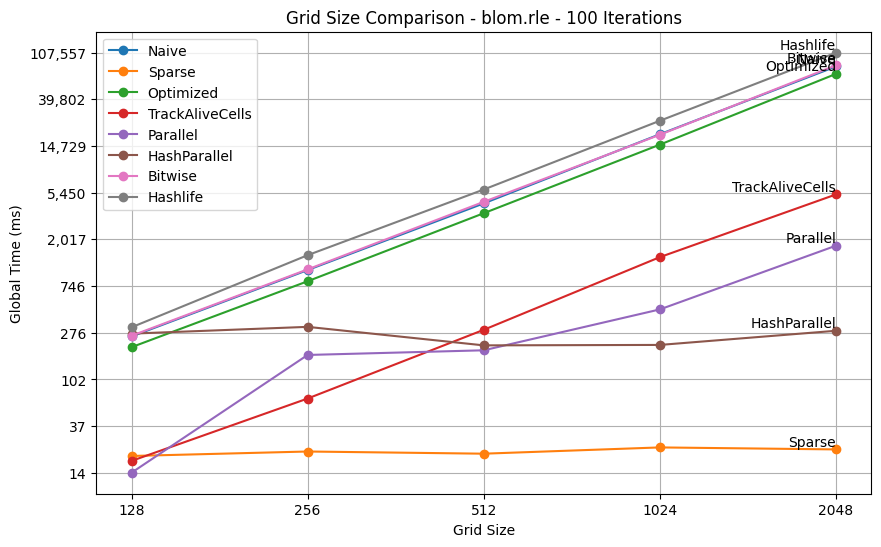

In [8]:
# Plotting global time against grid sizes 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# File name (update this if necessary)
csv_filename = "blom.rle_100_5_results.csv"

# Read metadata (first row)
with open(csv_filename, "r") as f:
    reader = csv.reader(f)
    metadata = next(reader)

# Extract metadata info
file_name = metadata[0].split(": ")[1]
iterations = metadata[1].split(": ")[1]

# Read CSV data while skipping metadata
df = pd.read_csv(csv_filename, skiprows=1)

# Convert Grid Size and Global Time to log2 scale
df["Log2 Grid Size"] = np.log2(df["Grid size"])
df["Log2 Global Time"] = np.log2(df["Global Time (ms)"])

# Plot settings
plt.figure(figsize=(10, 6))

# Plot each version
for version in df["Name"].unique():
    subset = df[df["Name"] == version]
    plt.plot(subset["Log2 Grid Size"], subset["Log2 Global Time"], marker="o", label=version)
    
    last_point = subset.iloc[-1]
    plt.text(last_point["Log2 Grid Size"], last_point["Log2 Global Time"], version,
             fontsize=10, verticalalignment='bottom', horizontalalignment='right')
# Labels and Title
plt.xlabel("Grid Size")
plt.ylabel("Global Time (ms)")
plt.title(f"Grid Size Comparison - {file_name} - {iterations} Iterations")
plt.legend()
plt.grid(True)

# Set custom x-axis ticks to show actual Grid Sizes
grid_sizes = sorted(df["Grid size"].unique())
plt.xticks(np.log2(grid_sizes), grid_sizes)  # Log2 positions, but actual numbers as labels

# Set custom y-axis ticks to show actual Global Time values
y_min, y_max = df["Global Time (ms)"].min(), df["Global Time (ms)"].max()
y_ticks = np.geomspace(y_min, y_max, num=10)  # Generate 10 evenly spaced values on log scale
plt.yticks(np.log2(y_ticks), [f"{int(y):,}" for y in y_ticks])  
# Show the plot
plt.show()



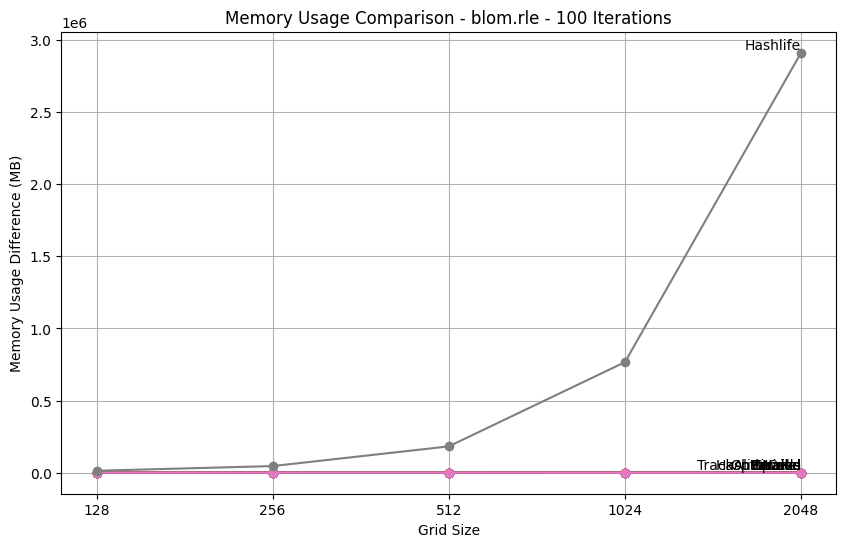

In [13]:
# visualizing memory usage

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# File name (update this if necessary)
csv_filename = "blom.rle_100_5_results.csv"

# Read metadata (first row)
with open(csv_filename, "r") as f:
    reader = csv.reader(f)
    metadata = next(reader)

# Extract metadata info
file_name = metadata[0].split(": ")[1]
iterations = metadata[1].split(": ")[1]

# Read CSV data while skipping metadata
df = pd.read_csv(csv_filename, skiprows=1)

# Extract and calculate memory usage difference
df["Memory Usage"] = df["Memory Usage before and after (MB)"].apply(lambda x: eval(x))  # Convert string list to actual list
df["Memory Usage Diff (MB)"] = df["Memory Usage"].apply(lambda x: x[1] - x[0])  # Calculate the difference

# Convert Grid Size to log2 scale (for better visualization)
df["Log2 Grid Size"] = np.log2(df["Grid size"])

# Plot settings for Memory Usage vs Grid Size
plt.figure(figsize=(10, 6))

# Plot memory usage difference for each version
for version in df["Name"].unique():
    subset = df[df["Name"] == version]
    plt.plot(subset["Log2 Grid Size"], subset["Memory Usage Diff (MB)"], marker="o")
    
    # Get the last point of the line to place the text near it
    last_point = subset.iloc[-1]
    plt.text(last_point["Log2 Grid Size"], last_point["Memory Usage Diff (MB)"], version,
             fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Labels and Title for Memory Usage Plot
plt.xlabel("Grid Size")
plt.ylabel("Memory Usage Difference (MB)")
plt.title(f"Memory Usage Comparison - {file_name} - {iterations} Iterations")
plt.grid(True)

# Set custom x-axis ticks to show actual Grid Sizes
grid_sizes = sorted(df["Grid size"].unique())
plt.xticks(np.log2(grid_sizes), grid_sizes)  # Log2 positions, but actual numbers as labels

# Show the plot for Memory Usage
plt.show()

